In [3]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [4]:
# #Mounting GoogleDrive
# from google.colab import drive
# drive.mount('/content/drive/')

In [5]:
#Reading the file
# df = pd.read_csv("/content/drive/MyDrive/Datasets/Company_Data.csv")
df=pd.read_csv("Company_Data.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
#For three categories lets divide the Sales values with Quartiles , less than first quartile as Low , between Second Quartile as Medium and above Third Quartile as High
df.Sales.max()

16.270/3

5.423333333333333

In [8]:
16.270/3

5.423333333333333

In [9]:
5.423333333333333*2

10.846666666666666

In [10]:
5.423333333333333*3

16.27

In [11]:
df1=df.copy()
df1['Sales_cat'] = pd.cut(x = df1['Sales'], bins = [0,5.39,9.46,17], labels=['Low','Medium','High'], right = False)
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [12]:
df1.Sales_cat.value_counts()

Medium    209
Low       100
High       91
Name: Sales_cat, dtype: int64

<Axes: >

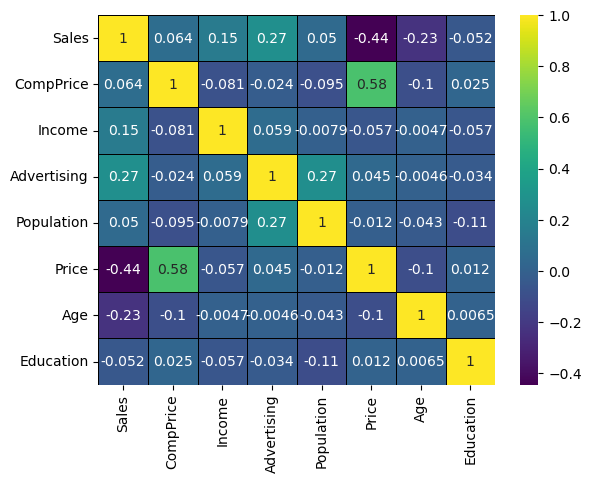

In [13]:
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis",  linewidths=0.5, linecolor='black')

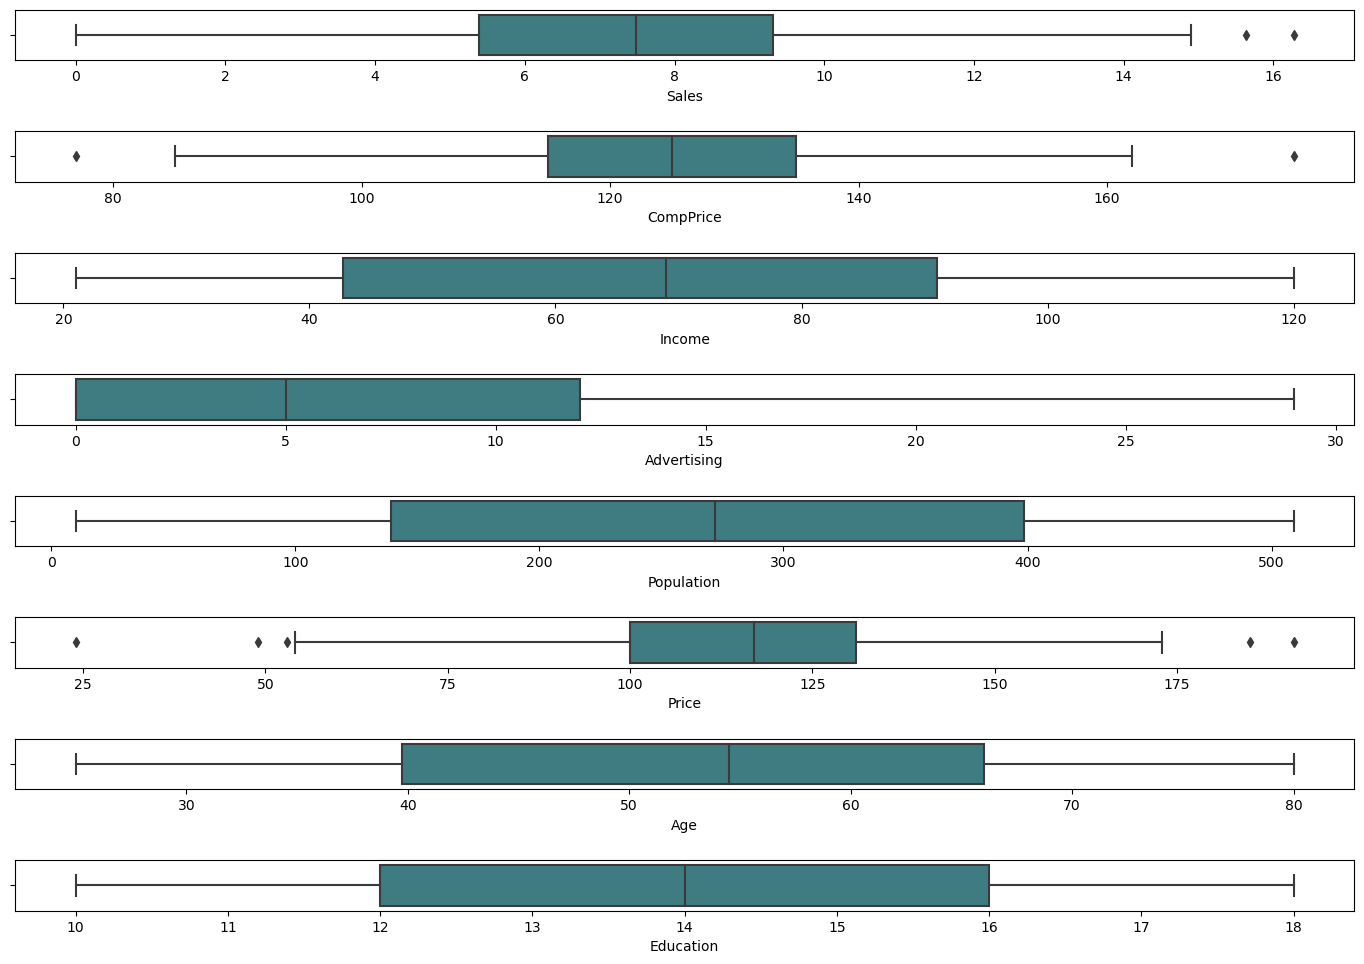

In [14]:
ot=df1.copy()
fig, axes=plt.subplots(8,1,figsize=(14,10),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

In [15]:
#Outliers
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = [  "CompPrice" , "Price" ]
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = df1.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[columns].quantile(0.25)
    Q3 = data_without_outliers[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[columns] >= lower_whisker_Length) & (data_without_outliers[columns]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df1 = data_without_outliers

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US Sales_cat  
0

In [16]:
df1.drop("Sales",axis=1 ,inplace=True)

In [17]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df1["ShelveLoc"]=LE.fit_transform(df1["ShelveLoc"])
df1["Urban"]=LE.fit_transform(df1["Urban"])
df1["US"]=LE.fit_transform(df1["US"])
df1["Sales_cat"]=LE.fit_transform(df1["Sales_cat"])

df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [18]:
#Data Spliting

X=df1.iloc[:,0:10]
Y=df1[["Sales_cat"]]


In [19]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)


from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=6)

DT.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

print("Number of Nodes",DT.tree_.node_count)
print("Level of Depth",DT.tree_.max_depth)


0.891
0.622
Number of Nodes 69
Level of Depth 6


In [20]:
# validation set method --> validaton hold-off method
training_accuracy = []
test_accuracy = []
Tr = []
Ts = []

DT = DecisionTreeClassifier(max_depth=6)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))


Average trianing accuray 0.86
Average test accuray 0.61


In [21]:
#Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning
df1_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
df1_entropy.fit(X_train,Y_train)

Y_pred_train = df1_entropy.predict(X_train)
Y_pred_test = df1_entropy.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)


1.0
0.63


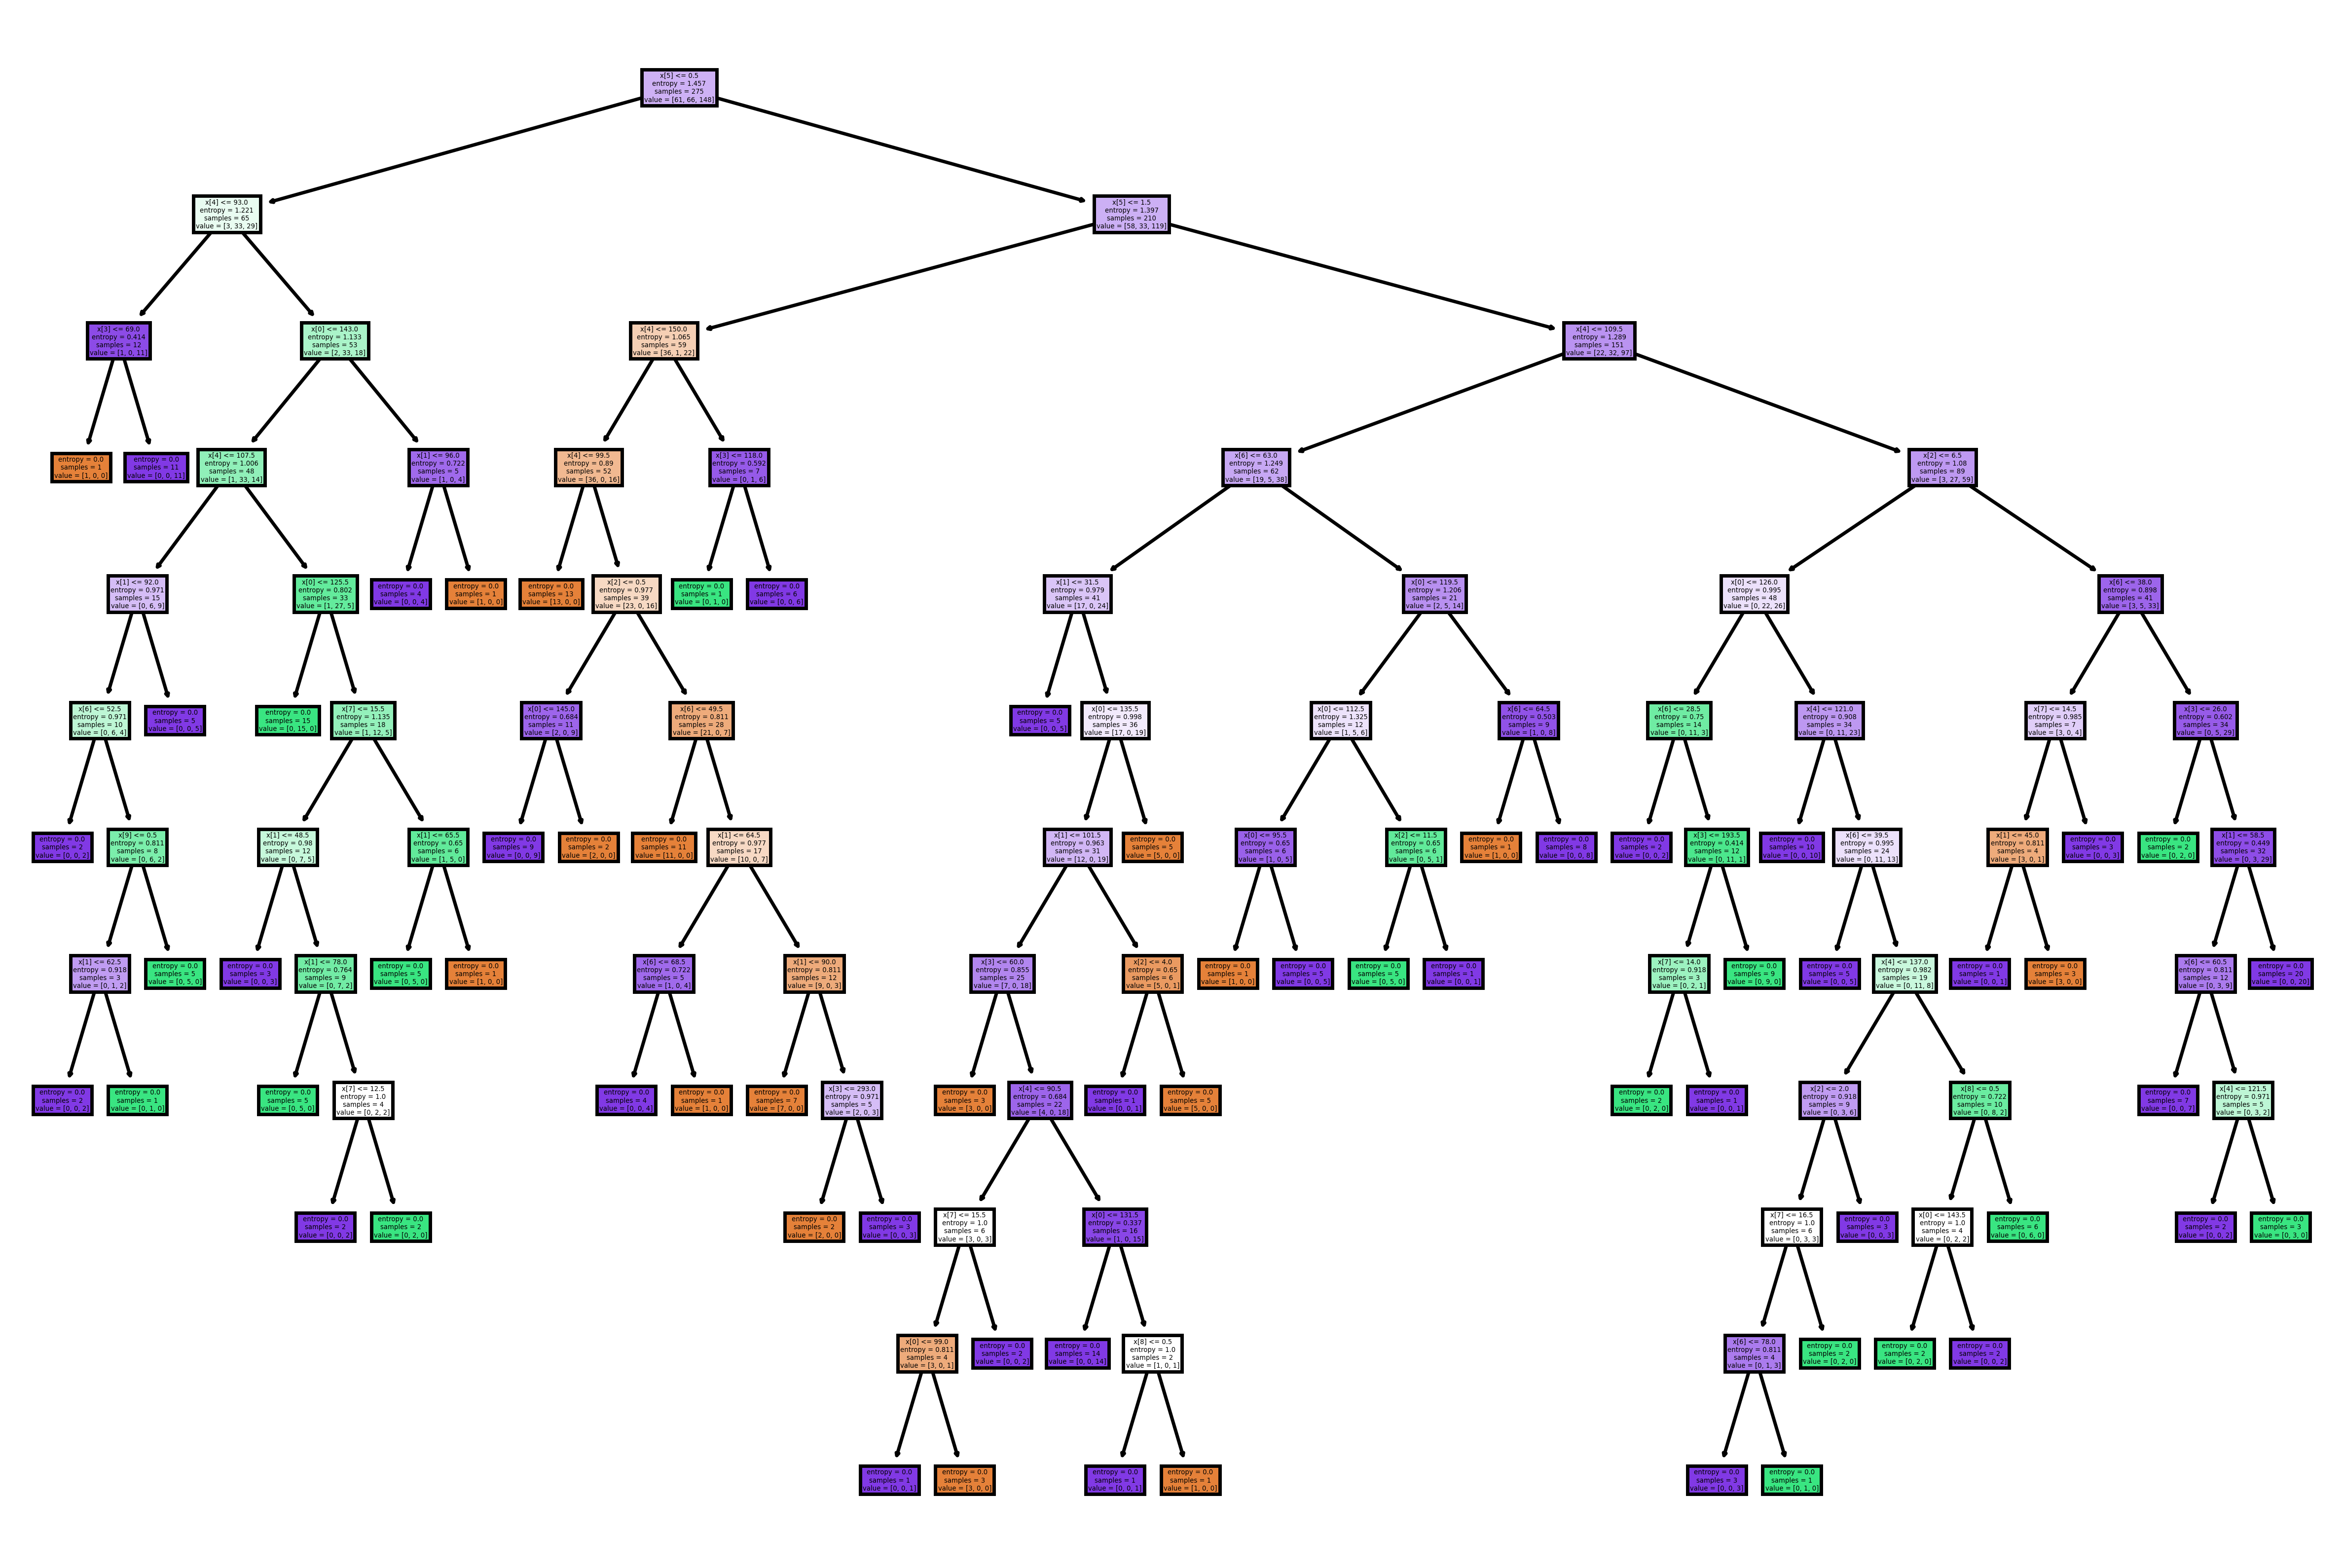

In [22]:
plt.figure(figsize=(12,8),dpi=500)
tree.plot_tree(df1_entropy,filled=True)
plt.show()

In [23]:
path = df1_entropy.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11599322835954551


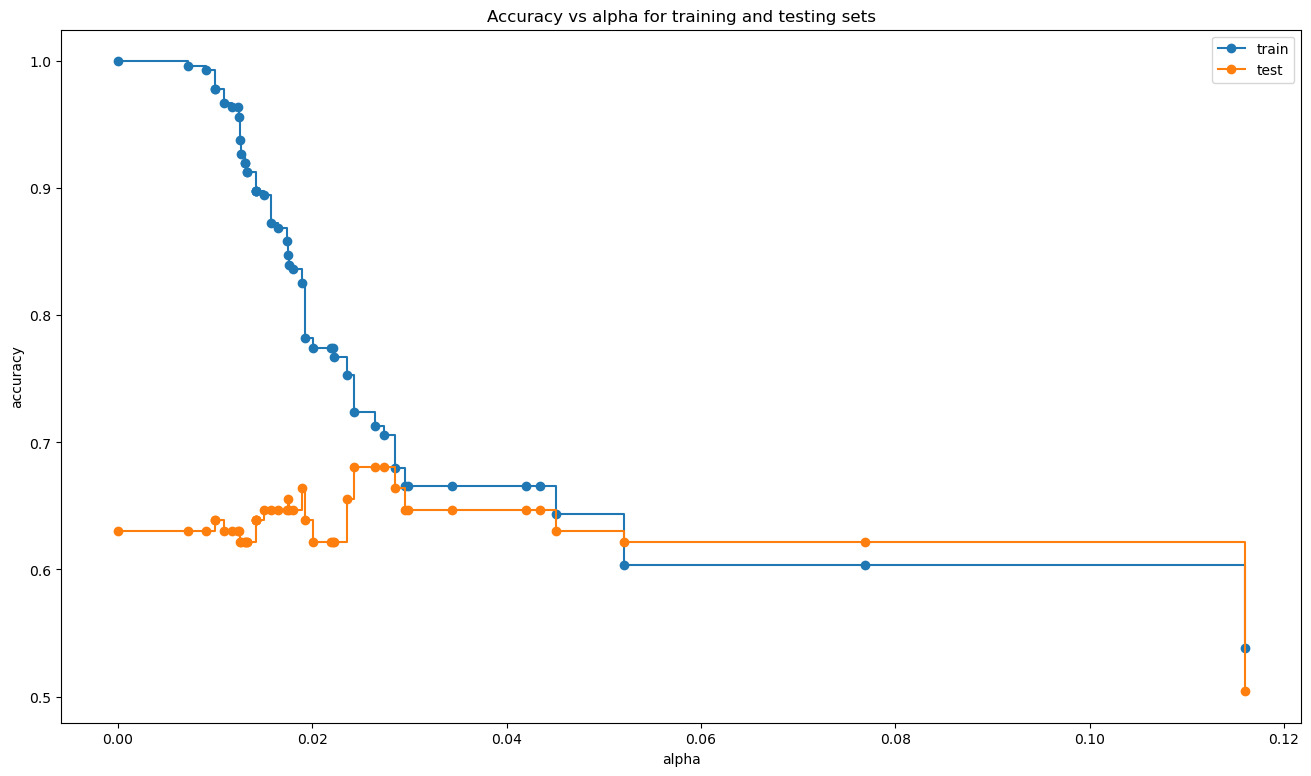

In [24]:
#Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [25]:
#Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.02876)
clf.fit(X_train,Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)


0.68
0.664


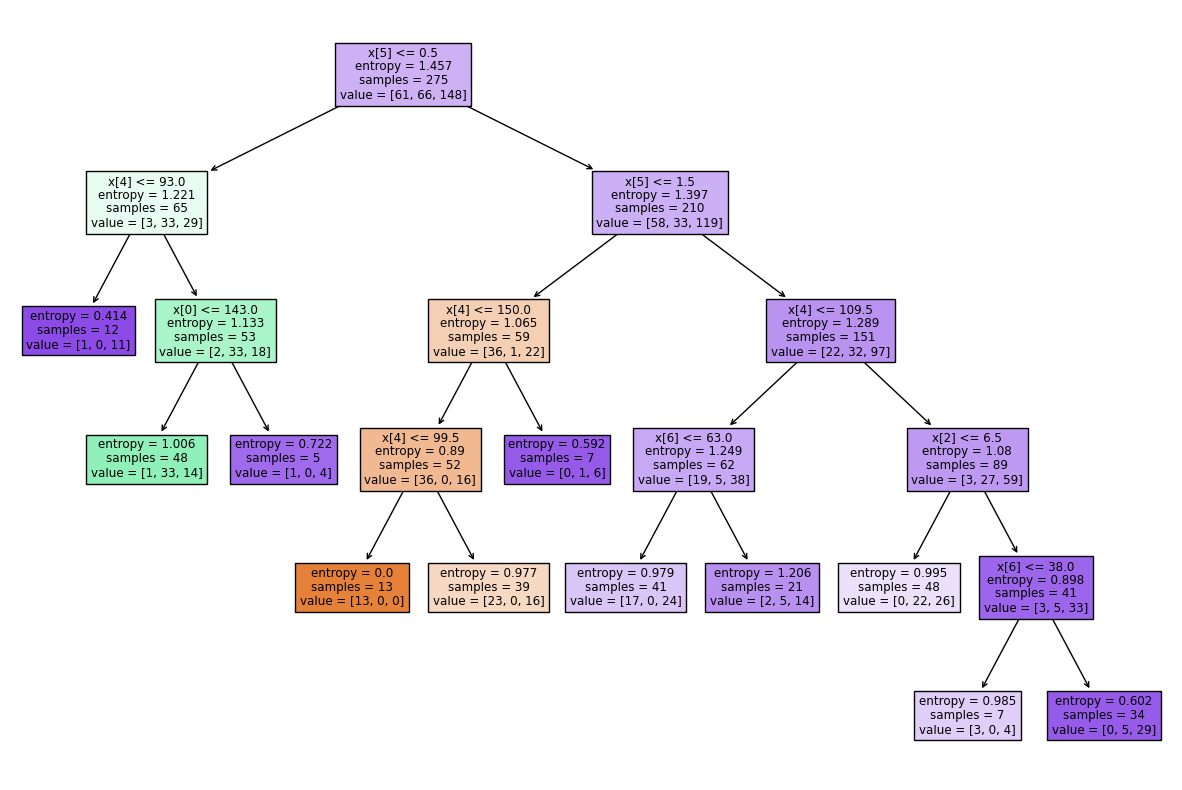

In [26]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [27]:
#Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning

df1_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
df1_gini.fit(X_train,Y_train)

Y_pred_train = df1_gini.predict(X_train)
Y_pred_test = df1_gini.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)



1.0
0.613


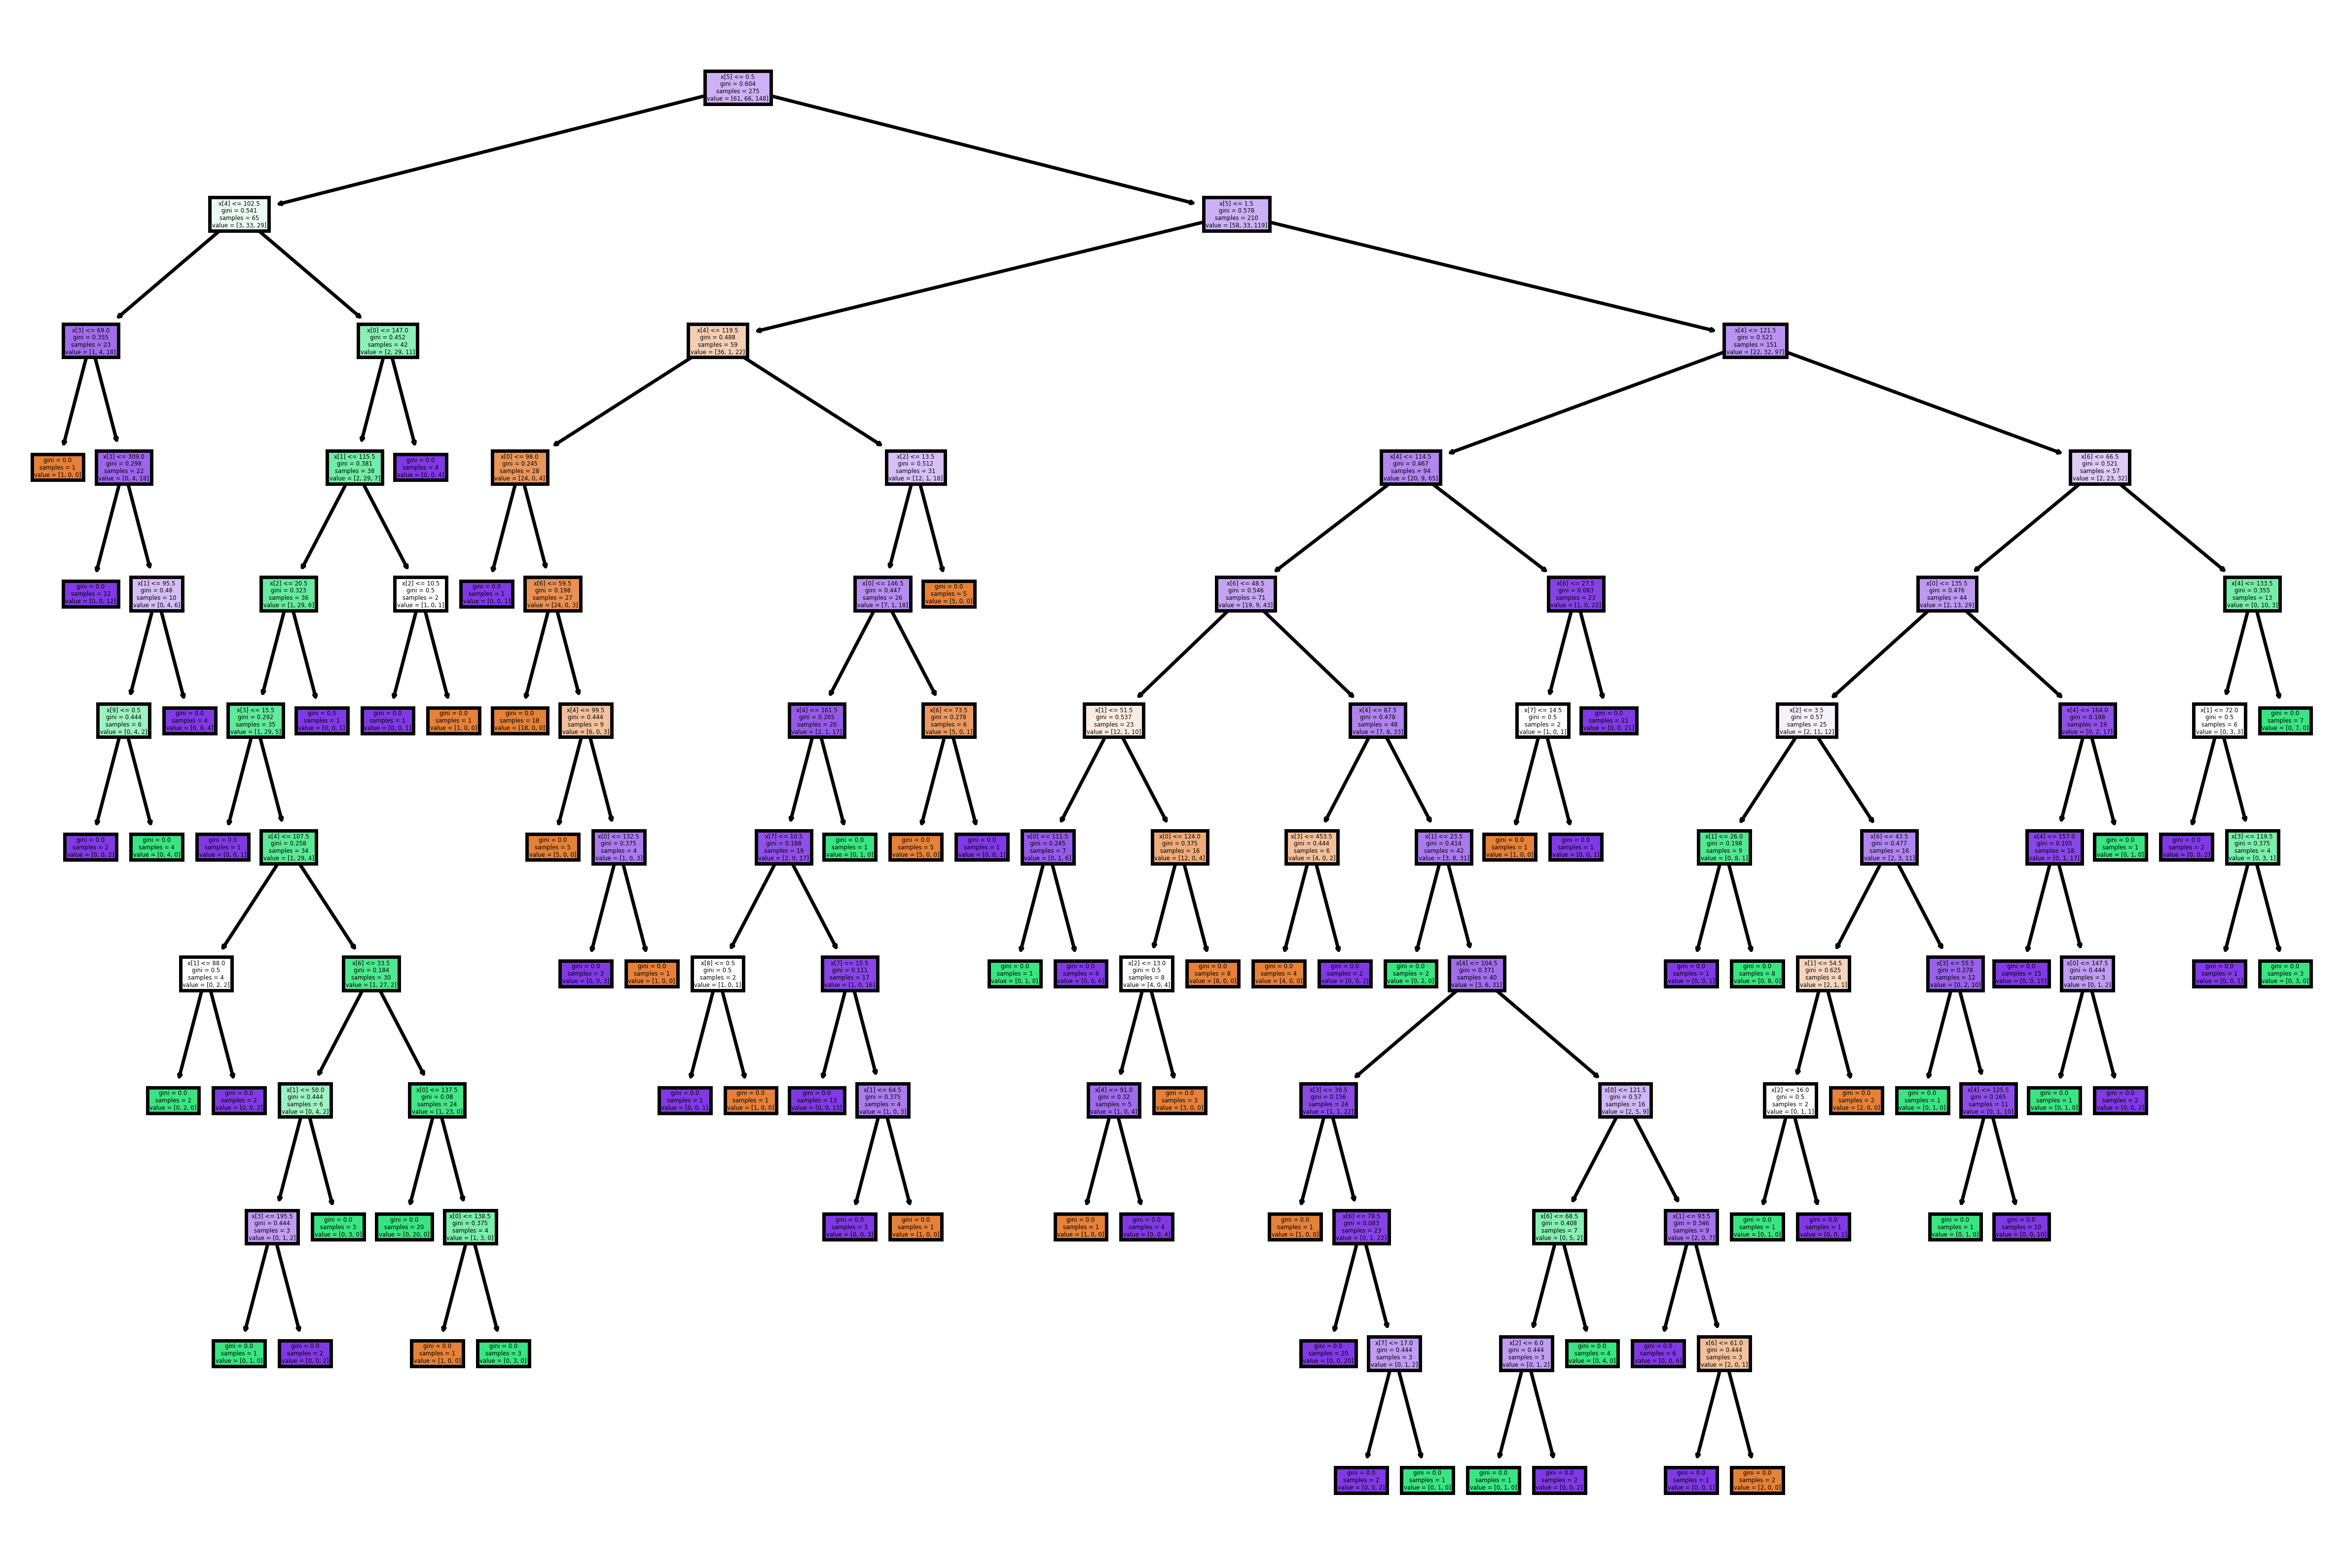

In [28]:
plt.figure(figsize=(12,8),dpi=500)
tree.plot_tree(df1_gini,filled=True)
plt.show()

In [29]:
path = df1_gini.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04235164540354586


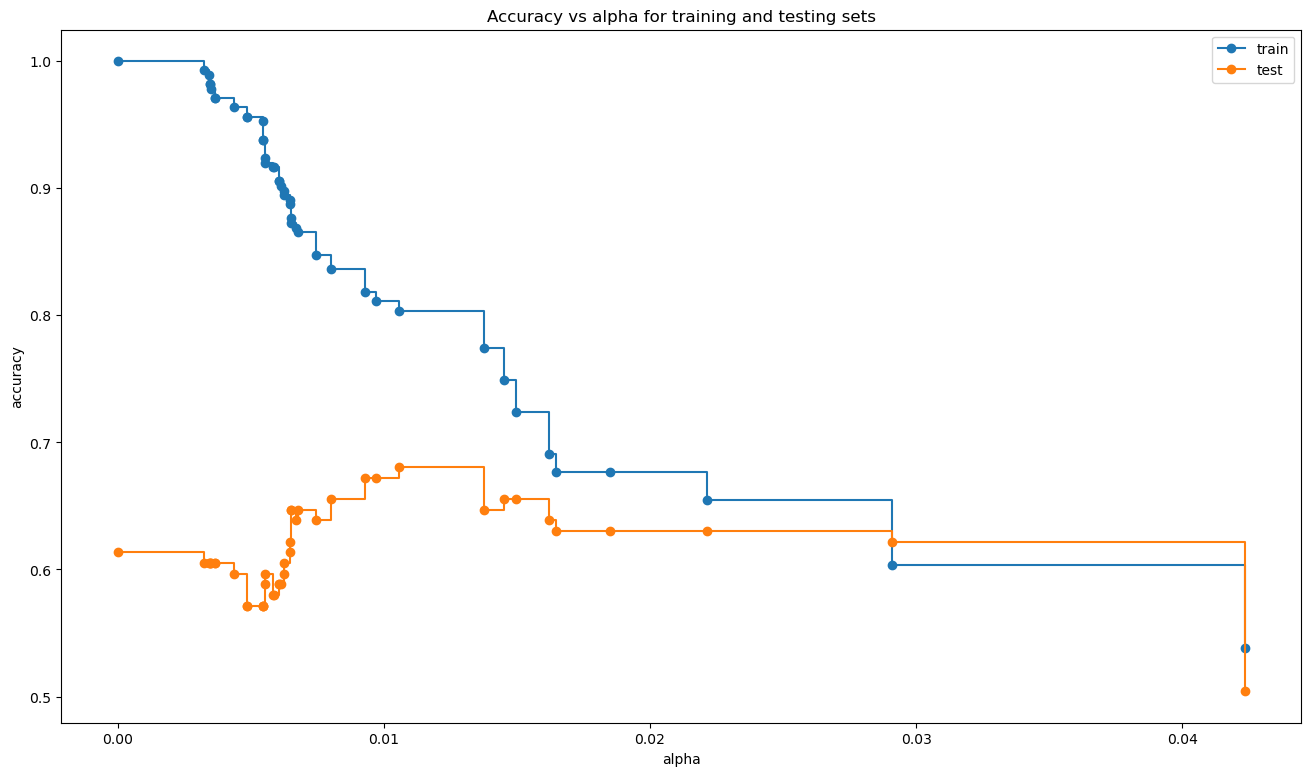

In [30]:
#Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [31]:
#Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other
clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.01567)
clf.fit(X_train,Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.724
0.655


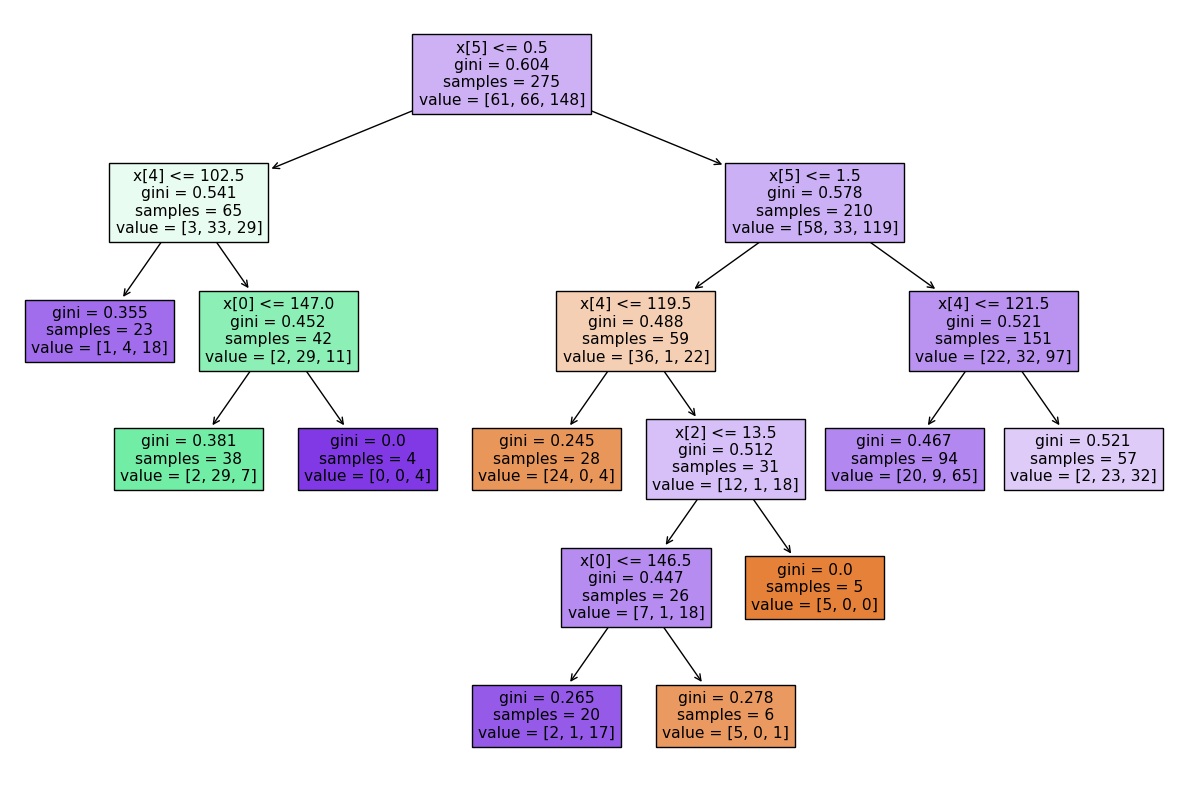

In [32]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()